# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Data yandex/real_estate_data.csv', '\t')
data.head(10) #посмотрим с чем предстоит работать

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info() #выводим основную информацию о датафрейме
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


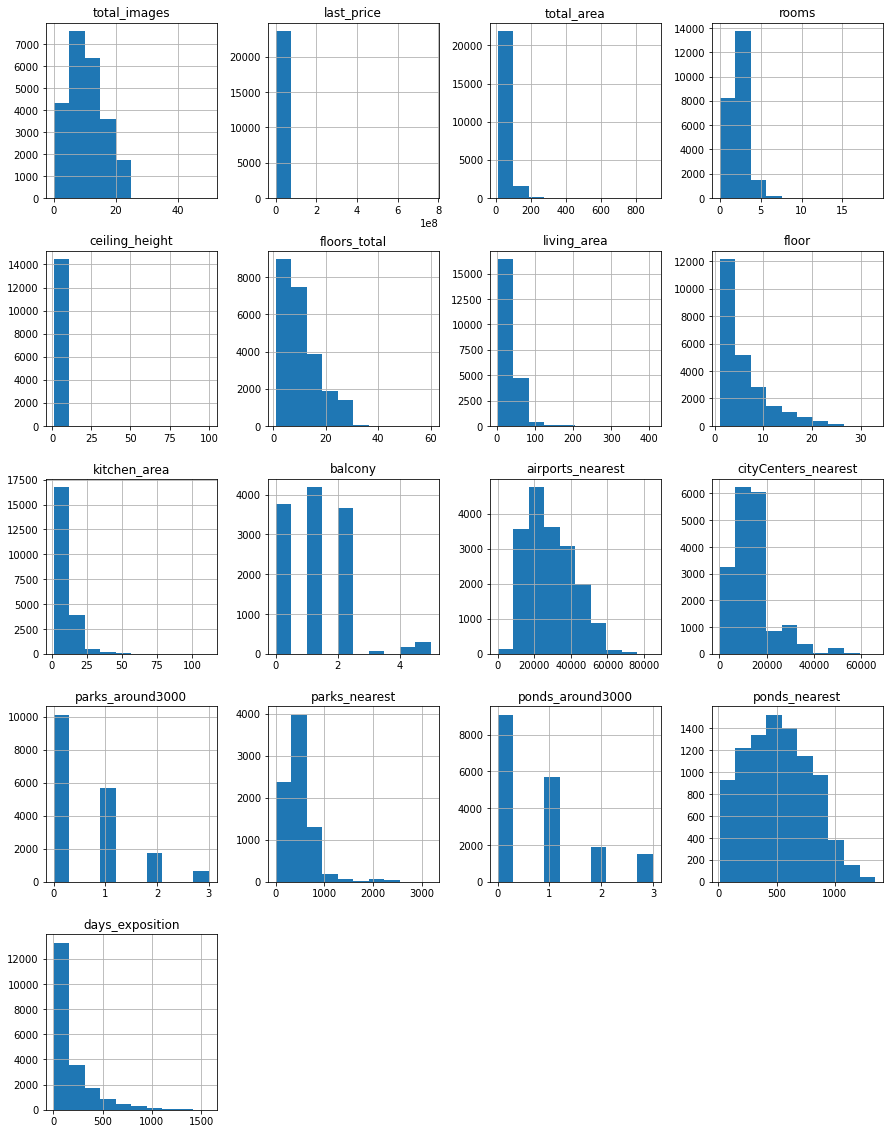

In [4]:
data.hist(figsize=(15, 20))
plt.show() # Построим общую гистограмму для всех числовых столбцов таблицы.

**Вывод по итогу предобработки:** 
  
Датасет состоит из 23699 строк и 22 столбцов. Из них, в 14 столбцах есть пропущенные значения. Так же видны и аноомальные значения, но нужно рассмотреть каждый столбец отдельно (чем займёмся в следующем разделе).
  
Описание данных  
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах (м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — общая площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  

### Предобработка данных

**Работа с пропусками:**
Посмотрим количество пропусков для каждого столбца

In [5]:
data.isnull().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Пропусков очень много, будем исправлять.**

 **Столбец ceiling_height  (высота потолков):** пропусков очень много, можно заполнить средним значением, но сейчас не понятно пригодится ли нам это в дальнейшем исследовании, пока оставим как есть.

Text(0, 0.5, 'Количество объектов')

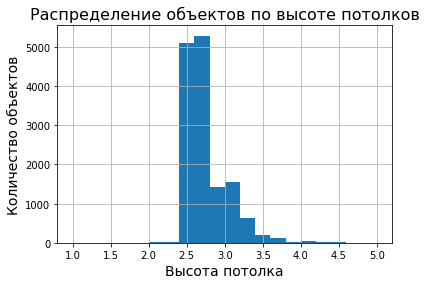

In [61]:
data['ceiling_height'].hist(bins=20, range=(1, 5))
plt.title('Распределение объектов по высоте потолков', fontsize=16)
plt.xlabel('Высота потолка', fontsize=14) 
plt.ylabel('Количество объектов', fontsize=14)

In [7]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Потолки по 100 метров - присутствуют аномальные значения. Пока оставим.

**Столбец floors_total  (всего этажей в доме):** 86 пропусков не так уж и много, можно заполнить средним значением, например относительно удалённости от центра. Пока оставим как есть.

**Столбец living_area (жилая площадь в квадратных метрах (м²)):** пропусков много, понятно что эта информация нужна для исследования => можно попробовать заполнить средним значением в зависимости от количества комнат (в этом столбце нет пропусков).

In [8]:
for median_rooms in data['rooms'].unique():
    data.loc[(data['rooms'] == median_rooms) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == median_rooms), 'living_area'].median()

In [9]:
data['living_area'].isnull().sum() # Проверяем что все пропуски заполнены

0

Text(0, 0.5, 'Количество объектов')

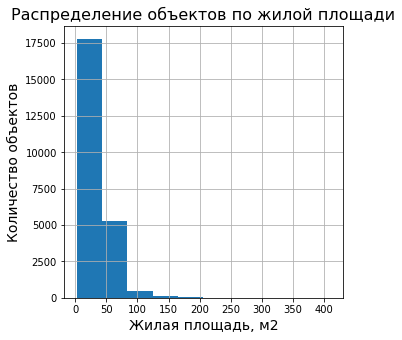

In [62]:
data['living_area'].hist(figsize=(5, 5)) # удобно посмотреть на гистограмме что получилось (и проверить)
plt.title('Распределение объектов по жилой площади', fontsize=16)
plt.xlabel('Жилая площадь, м2', fontsize=14) 
plt.ylabel('Количество объектов', fontsize=14)

**Столбец is_apartment (апартаменты):** Данных вообще практически нет, посмотрим внимательнее что там:

In [11]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Всего 50 аппартаментов из ~3 тысяч заполненных данных - выглядит странно. Нет идей что с этим можно сделать. Пока оставим как есть, посмотрим пригодится ли этот столбец нам в дальнейшем.

**Столбец kithcen_area (площадь кухни в квадратных метрах (м²)):** Пропусков достаточно много (~10%), было бы хорошо исправить, непонятно по какому столбцу этом можно осуществить. Пока оставим.

**Столбец balcony (число балконов):** Очень много пропусков, посмотрим внимательнее:

In [12]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Похоже на то что в пропусках квартиры без балкона, заменим пропуски на ноль и нужно изменить тип данных на int:

In [13]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')
data['balcony'].head(10)

0    0
1    2
2    0
3    0
4    0
5    0
6    1
7    2
8    0
9    2
Name: balcony, dtype: int32

**Столбец locality_name (название населённого пункта):** Пропусков не много и с ними ничего сделать не получится, пока оставляем.

**Столбцы airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest:**  Подозрительное совпадение кол-ва пропусков, посмотрим несколько строк:

In [14]:
data[data['airports_nearest'].isna()].head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,17.60,2,NaN,...,NaN,0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,30.50,1,NaN,...,NaN,0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18.0,16.30,9,NaN,...,11.60,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,NaN,4.0,42.50,3,NaN,...,5.70,1,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,NaN,12.0,17.60,8,NaN,...,NaN,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.80,9.0,48.80,5,NaN,...,11.90,2,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


Отсутствующие значения не разбросаны, а находятся в одних и тех же строках. Оставляем так.

**Столбец days_exposition (сколько дней было размещено объявление (от публикации до снятия)):** Пропусков много (более 10%) посмотрим внимательнее:

In [15]:
data[data['days_exposition'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,30.50,22,NaN,...,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,17.60,3,NaN,...,NaN,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.30,7,NaN,...,7.0,0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.70,9,NaN,...,8.3,2,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
49,1,3050000.0,30.8,2018-11-22T00:00:00,1,2.50,9.0,18.00,7,NaN,...,6.0,0,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN
52,20,11795000.0,136.0,2017-09-22T00:00:00,6,3.00,2.0,94.00,2,NaN,...,11.0,1,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN
71,20,4850000.0,57.5,2019-03-27T00:00:00,3,2.50,9.0,39.00,8,NaN,...,6.2,0,Санкт-Петербург,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,NaN,10.0,17.60,6,NaN,...,NaN,0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,11,2400000.0,43.9,2019-03-13T00:00:00,2,NaN,2.0,27.46,1,NaN,...,5.2,0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Заменим пропуски на ноль и поменяем тип данных на int:

In [16]:
data['days_exposition'] = data['days_exposition'].fillna(0)
data['days_exposition'] = data['days_exposition'].astype('int')
data['days_exposition'].head(10)

0      0
1     81
2    558
3    424
4    121
5     55
6    155
7      0
8    189
9    289
Name: days_exposition, dtype: int32

**С пропусками всё, теперь немного навести порядок в остальных столбцах:**

**Столбец first_day_exposition (дата публикации):** Переведём в формат даты без времени (так как оно не указано):

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['first_day_exposition'].head(10)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
5   2018-09-10
6   2017-11-02
7   2019-04-18
8   2018-05-23
9   2017-02-26
Name: first_day_exposition, dtype: datetime64[ns]

**Столбец last_price:** поменяем тип данных на int:

In [18]:
data['last_price'] = data['last_price'].astype('int')
data['last_price']

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23699, dtype: int32

In [19]:
print(data.isnull().sum())
data.info()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  i

**Так выглядит уже лучше, с этим можно работать.**

### Посчитайте и добавьте в таблицу новые столбцы

**Добавляем в таблицу столбец с ценой одного квадратного метра:**

In [20]:
data['price_square_meter'] = data['last_price'] / data['total_area']
data['price_square_meter'].head(10)

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
5     95065.789474
6     99195.710456
7    110544.692737
8     87454.764777
9     88524.590164
Name: price_square_meter, dtype: float64

Не очень красивые данные, поменяем тип данных на int:

In [21]:
data['price_square_meter'] = data['price_square_meter'].astype('int')
data['price_square_meter']

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: price_square_meter, Length: 23699, dtype: int32

**Добавляем в таблицу столбец с днём недели публикации объявления (0 — понедельник, 1 — вторник и так далее):**

In [22]:
data['weekday_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['weekday_exposition'].head(10)

0    3
1    1
2    3
3    4
4    1
5    0
6    3
7    3
8    2
9    6
Name: weekday_exposition, dtype: int64

**Добавляем в таблицу столбец с месяцем публикации объявления:**

In [23]:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['month_exposition'].head(10)

0     3
1    12
2     8
3     7
4     6
5     9
6    11
7     4
8     5
9     2
Name: month_exposition, dtype: int64

**Добавляем в таблицу столбец с годом публикации объявления:**

In [24]:
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['year_exposition'].head(10)

0    2019
1    2018
2    2015
3    2015
4    2018
5    2018
6    2017
7    2019
8    2018
9    2017
Name: year_exposition, dtype: int64

**Добавляем в таблицу столбец с типом этажа квартиры (значения — «первый», «последний», «другой»):**

In [25]:
def categorize_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total:
            return 'последний'
        elif 1 < floor < floors_total:
            return 'другой'
    except:
        pass

In [26]:
data['floor_type'] = data.apply(categorize_floor, axis = 1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,1.0,482.0,2.0,755.0,0,120370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,0.0,NaN,0.0,NaN,81,82920,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,1.0,90.0,2.0,574.0,558,92785,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,NaN,14.0,45.00,9,NaN,...,2.0,84.0,3.0,234.0,424,408176,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,2.0,112.0,1.0,48.0,121,100000,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,NaN,NaN,NaN,NaN,55,95065,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,0.0,NaN,0.0,NaN,155,99195,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,30.50,22,NaN,...,0.0,NaN,0.0,NaN,0,110544,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,NaN,NaN,NaN,NaN,189,87454,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,0.0,NaN,0.0,NaN,289,88524,6,2,2017,другой


**Добавляем в таблицу столбец с расстоянием до центра города в километрах (переведите из м в км и округлите до целых значений).:**

Данные в км, делим на тысячу:

In [27]:
data['distance_to_center_km'] = data['cityCenters_nearest'] / 1000
data['distance_to_center_km'].head(10)

0    16.028
1    18.603
2    13.933
3     6.800
4     8.098
5       NaN
6    19.143
7    11.634
8       NaN
9    15.008
Name: distance_to_center_km, dtype: float64

**Аномальные значения:**

**Столбец ceiling_height (высота потолков):**

In [28]:
data_2 = data[data['ceiling_height'] > 20]
data_2['ceiling_height'].describe()

count     22.000000
mean      29.777273
std       15.836845
min       22.600000
25%       25.000000
50%       27.000000
75%       27.000000
max      100.000000
Name: ceiling_height, dtype: float64

Всего 22 строки с потолками выше 20 метров, большая часть в районе 25 - 27 = очевидная ошибка, скорее всего это потолки 2.5 - 2.7 метра соответственно. Так как таких данных мало - пока оставим как есть, посмотрим как скажется на дальнейшем исследовании. Единственный с значением 100 - можно просто удалить, чтоб не мешался.

In [29]:
data = data.loc[data['ceiling_height'] != 100]
data['ceiling_height'].describe()

count    14503.000000
mean         2.764795
std          0.968741
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

**Столбец total_area (общая площадь квартиры в квадратных метрах (м²)):**

In [30]:
data['living_area'].describe()

count    23698.000000
mean        34.322839
std         21.700683
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

Минимальное значение 2 м2, посмотрим сколько таких микро квартир:

In [31]:
data_3 = data[data['living_area'] < 10]
data_3['ceiling_height'].describe()

count    17.000000
mean      2.747059
std       0.252160
min       2.500000
25%       2.600000
50%       2.700000
75%       2.800000
max       3.500000
Name: ceiling_height, dtype: float64

Скорее всего таже ошибка что и с высотой потолков 2.5-2.8 = 25 и 28 метров соответственно. Таких значений очень мало, оставляем как есть.

**Столбец floor_total (всего этажей в доме):**

In [32]:
data['floors_total'].describe()

count    23612.000000
mean        10.674064
std          6.597209
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Гугл подсказывает что в Питере нет зданий в 60 этажей (максимум 35) и в соседнем столбце floor максимальное значение 33. Всё что выше - явная ошибка, посмотрим сколько их:

In [33]:
data_4 = data[data['floors_total'] > 35]
data_4['floors_total'].describe()

count     6.000000
mean     42.833333
std      10.515069
min      36.000000
25%      36.000000
50%      36.500000
75%      48.250000
max      60.000000
Name: floors_total, dtype: float64

Всего 6 значений - незначительно. Пока оставим как есть.

**Неявные дубликаты**

In [34]:
print(data['locality_name'].value_counts())
data['locality_name'].unique() # смотрим какие слова нужно убрать или поправить

Санкт-Петербург                      15720
посёлок Мурино                         522
посёлок Шушары                         440
Всеволожск                             398
Пушкин                                 369
                                     ...  
посёлок Высокоключевой                   1
село Никольское                          1
посёлок Пансионат Зелёный Бор            1
посёлок Коробицыно                       1
садовое товарищество Приладожский        1
Name: locality_name, Length: 364, dtype: int64


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [35]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок ', '')
data['locality_name'] = data['locality_name'].str.replace('деревня ', '')
data['locality_name'] = data['locality_name'].str.replace('городского ', '')
data['locality_name'] = data['locality_name'].str.replace('село ', '')
data['locality_name'] = data['locality_name'].str.replace('городской ', '')
data['locality_name'] = data['locality_name'].str.replace('типа ', '')
data['locality_name'].value_counts()

санкт-петербург                       15720
мурино                                  590
кудрово                                 472
шушары                                  440
всеволожск                              398
                                      ...  
при железнодорожной станции вещево        1
кисельня                                  1
тесово-4                                  1
большая пустомержа                        1
русско                                    1
Name: locality_name, Length: 311, dtype: int64

Почистили с 364 значений до 311 - так гораздо лучше.

**Вывод по итогам предобработки данных:**  

Пропусков много, к сожалению, не везде их можно заполнить.  

**Исправлены пропуски в столбцах:**   
Столбец balcony (число балконов): В пропусках, скорее всего все квартиры без балкона - все пропуски заменили на 0.  
Столбец days_exposition (сколько дней было размещено объявление (от публикации до снятия)): Все пропуски заменены на 0. 
Столбец first_day_exposition (дата публикации): Переведён в формат даты без времени (так как оно не указано).  
Столбец last_price: Изменён тип данных на int.  

**В таблицу добавлены новые столбцы:**   
Cтолбец с ценой одного квадратного метра.  
Cтолбец с днём недели публикации объявления.  
Cтолбец с месяцем публикации объявления.  
Cтолбец с годом публикации объявления.  
Cтолбец с типом этажа квартиры (значения — «первый», «последний», «другой»).  
Cтолбец с расстоянием до центра города в километрах (переведите из м в км и округлите до целых значений). 
  
  
**Исправленны аномальные значения и неявные дубликаты в столбцах:**   
Столбец ceiling_height (высота потолков): Единственный с значением 100 - удалён.  
Столбец locality_name (название населённого пункта): Убраны все неявные дубликаты. Количество значений сократилось с 364 значений до 311.  
    

### Проведите исследовательский анализ данных

**1. Изучите следующие параметры объектов:**

count    23698.000000
mean        60.350143
std         35.654096
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

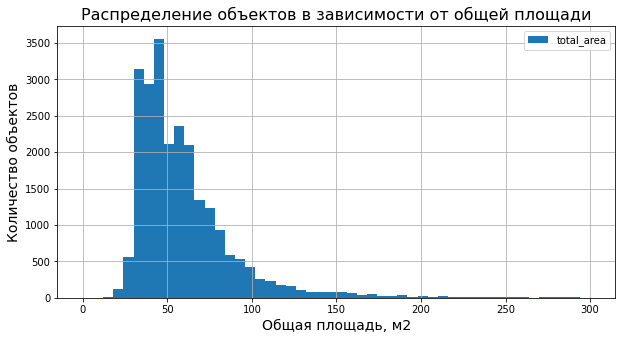

In [70]:
data.plot(y='total_area', kind='hist', bins=50, grid=True, figsize=(10,5), range=(0,300))
plt.title('Распределение объектов в зависимости от общей площади', fontsize=16)
plt.xlabel('Общая площадь, м2', fontsize=14) 
plt.ylabel('Количество объектов', fontsize=14)
data['total_area'].describe()

**Вывод total_area:** По гистограмме видим что среди объявлений о продаже преобладают квартиры с площадью от 40 до 70 м2.

count    23698.000000
mean        34.322839
std         21.700683
min          2.000000
25%         18.400000
50%         30.300000
75%         42.700000
max        409.700000
Name: living_area, dtype: float64

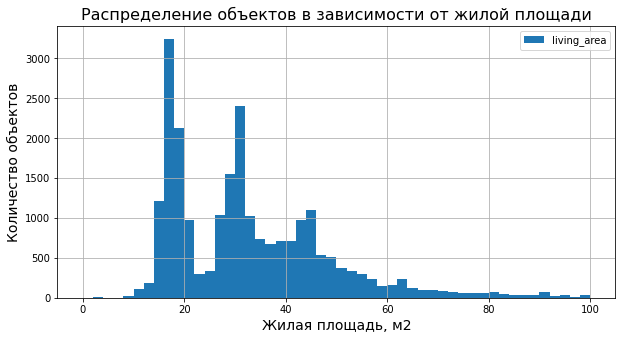

In [71]:
data.plot(y='living_area', kind='hist', bins=50, grid=True, figsize=(10,5), range=(0,100))
plt.title('Распределение объектов в зависимости от жилой площади', fontsize=16)
plt.xlabel('Жилая площадь, м2', fontsize=14) 
plt.ylabel('Количество объектов', fontsize=14)
data['living_area'].describe()

**Вывод living_area:** Чаще всего встречаются квартиры с площадью от 20 до 45 м2. На гистрограмме есть 3 пика, подозреваю что они связаны с самыми популярными площадями для 1 комнатной, 2х комнатной и 3х комнтатной квартиры соответственно.

count    21420.000000
mean        10.569787
std          5.905575
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

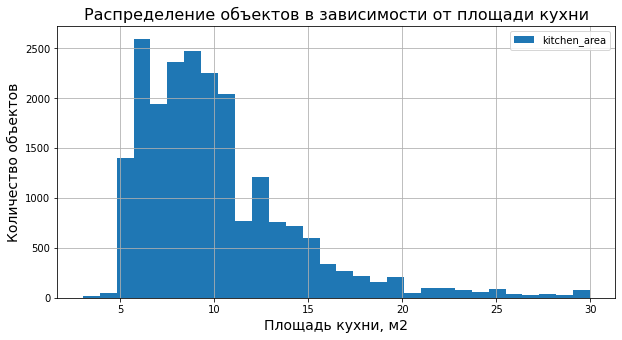

In [72]:
data.plot(y='kitchen_area', kind='hist', bins=30, grid=True, figsize=(10,5), range=(3,30))
plt.title('Распределение объектов в зависимости от площади кухни', fontsize=16)
plt.xlabel('Площадь кухни, м2', fontsize=14) 
plt.ylabel('Количество объектов', fontsize=14)
data['kitchen_area'].describe()

**Вывод kithcen_area:** Преобладают кухни с площадью от 7 до 12 м2.

count    23698.000000
mean         6.541192
std         10.887104
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799750
max        763.000000
Name: last_price_mln, dtype: float64

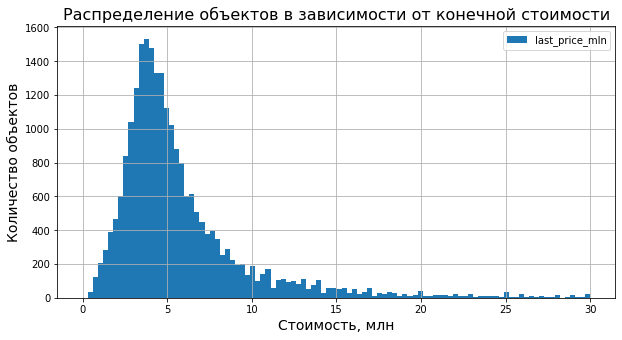

In [73]:
data['last_price_mln'] = data['last_price']/1000000
data.plot(y='last_price_mln', kind='hist', bins=100, grid=True, figsize=(10,5), range=(0,30))
plt.title('Распределение объектов в зависимости от конечной стоимости', fontsize=16)
plt.xlabel('Стоимость, млн', fontsize=14) 
plt.ylabel('Количество объектов', fontsize=14)
data['last_price_mln'].describe()

**Вывод last_price:** Для покупки квартиры в Питере в среднем нужно приготовить от 3.4 до 7 млн рублей.

count    23698.000000
mean         2.070681
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

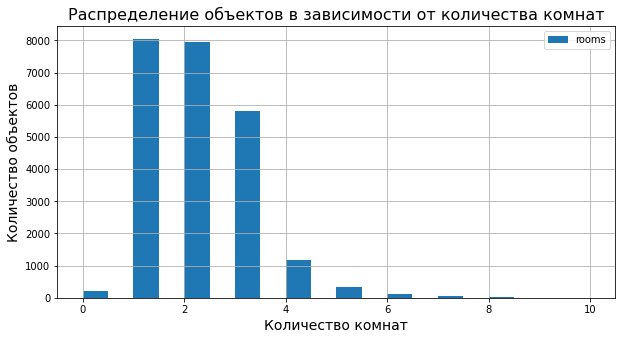

In [74]:
data.plot(y='rooms', kind='hist', bins=20, grid=True, figsize=(10,5), range=(0,10))
plt.title('Распределение объектов в зависимости от количества комнат', fontsize=16)
plt.xlabel('Количество комнат', fontsize=14) 
plt.ylabel('Количество объектов', fontsize=14)
data['rooms'].describe()

**Вывод rooms:** Среди объявлений преобладают 1 и 2х комнатные кваритры.

count    14503.000000
mean         2.764795
std          0.968741
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max         32.000000
Name: ceiling_height, dtype: float64

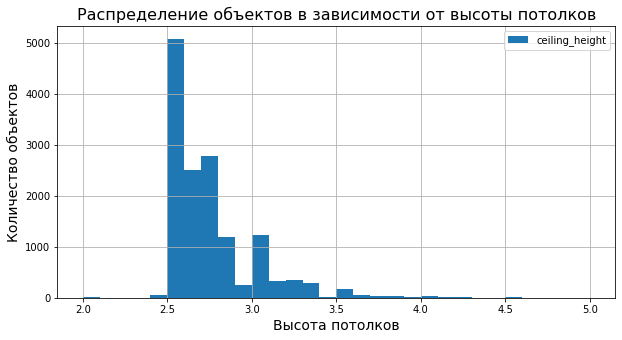

In [75]:
data.plot(y='ceiling_height', kind='hist', bins=30, grid=True, figsize=(10,5), range=(2,5))
plt.title('Распределение объектов в зависимости от высоты потолков', fontsize=16)
plt.xlabel('Высота потолков', fontsize=14) 
plt.ylabel('Количество объектов', fontsize=14)
data['ceiling_height'].describe()

**Вывод ceiling_height:** Среди объявлений преобладают квартиры с высотой потолка от 2.5 до 2.8 метра.

count    23698.000000
mean         5.892396
std          4.885349
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

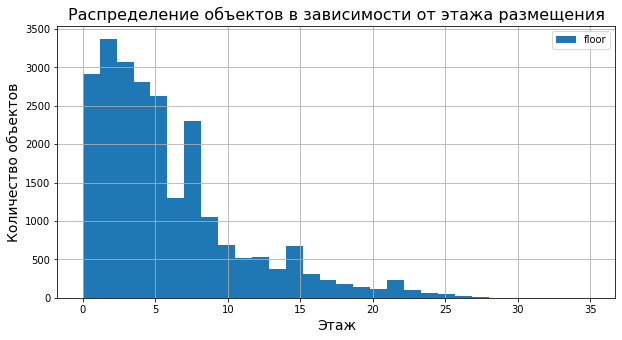

In [76]:
data.plot(y='floor', kind='hist', bins=30, grid=True, figsize=(10,5), range=(0,35))
plt.title('Распределение объектов в зависимости от этажа размещения', fontsize=16)
plt.xlabel('Этаж', fontsize=14) 
plt.ylabel('Количество объектов', fontsize=14)
data['floor'].describe()

**Вывод floor:** Среди объявлений преобладают квартиры с 1го по 8 этаж.

Text(0, 0.5, 'Количество объектов')

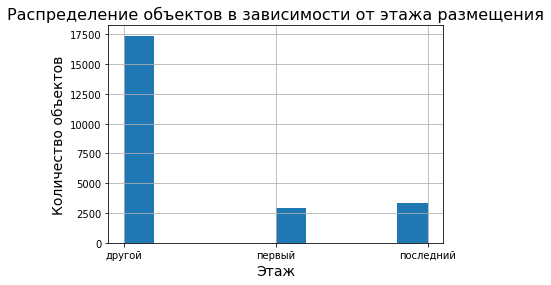

In [77]:
data['floor_type'].hist()
plt.title('Распределение объектов в зависимости от этажа размещения', fontsize=16)
plt.xlabel('Этаж', fontsize=14) 
plt.ylabel('Количество объектов', fontsize=14)

**Вывод floor_type:** Количество квартир на первом и последнем этаже примерно равно, преобладают коненчно же квартиры размещённые на других этажах.

count    23612.000000
mean        10.674064
std          6.597209
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

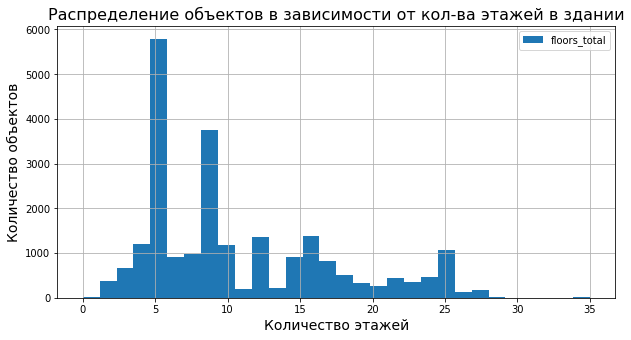

In [78]:
data.plot(y='floors_total', kind='hist', bins=30, grid=True, figsize=(10,5), range=(0,35))
plt.title('Распределение объектов в зависимости от кол-ва этажей в здании', fontsize=16)
plt.xlabel('Количество этажей', fontsize=14) 
plt.ylabel('Количество объектов', fontsize=14)
data['floors_total'].describe()

**Вывод floors_total:** Конечно же, большинство квартир размещены в пяти и девяти этажных зданиях.

count    18179.000000
mean     14191.602838
std       8608.511445
min        181.000000
25%       9238.000000
50%      13099.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

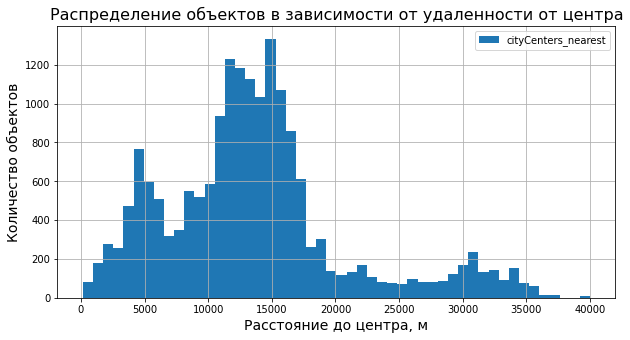

In [79]:
data.plot(y='cityCenters_nearest', kind='hist', bins=50, grid=True, figsize=(10,5), range=(150,40000))
plt.title('Распределение объектов в зависимости от удаленности от центра', fontsize=16)
plt.xlabel('Расстояние до центра, м', fontsize=14) 
plt.ylabel('Количество объектов', fontsize=14)
data['cityCenters_nearest'].describe()

**Вывод cityCenters_nearest:** Большая часть квартир расположена на расстоянии от 9 до 16 км от центра города. Видимо на этом расстоянии находятся основные спальные районы.

count    18156.000000
mean     28793.332397
std      12631.145489
min          0.000000
25%      18584.250000
50%      26726.000000
75%      37273.500000
max      84869.000000
Name: airports_nearest, dtype: float64

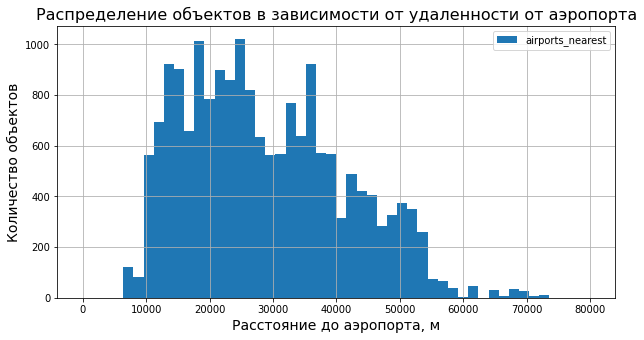

In [80]:
data.plot(y='airports_nearest', kind='hist', bins=50, grid=True, figsize=(10,5), range=(0,80000))
plt.title('Распределение объектов в зависимости от удаленности от аэропорта', fontsize=16)
plt.xlabel('Расстояние до аэропорта, м', fontsize=14) 
plt.ylabel('Количество объектов', fontsize=14)
data['airports_nearest'].describe()

**Вывод airports_nearest:** Аэропорт практически равно удалён от основных спальных районов на расстояние от 20 до 40 км. В непосредственной близости с аэропортом жилья нет.

count    8078.000000
mean      490.837707
std       342.326214
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

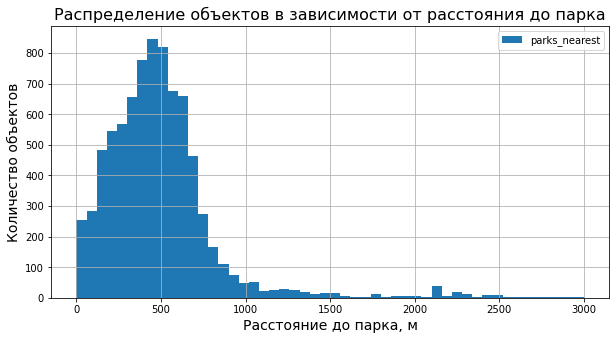

In [81]:
data.plot(y='parks_nearest', kind='hist', bins=50, grid=True, figsize=(10,5), range=(0,3000))
plt.title('Распределение объектов в зависимости от расстояния до парка', fontsize=16)
plt.xlabel('Расстояние до парка, м', fontsize=14) 
plt.ylabel('Количество объектов', fontsize=14)
data['parks_nearest'].describe()

**Вывод parks_nearest:** В среднем расстояние до ближайшего парка от 300 до 600 метров.

count    23698.000000
mean         2.569331
std          1.789116
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

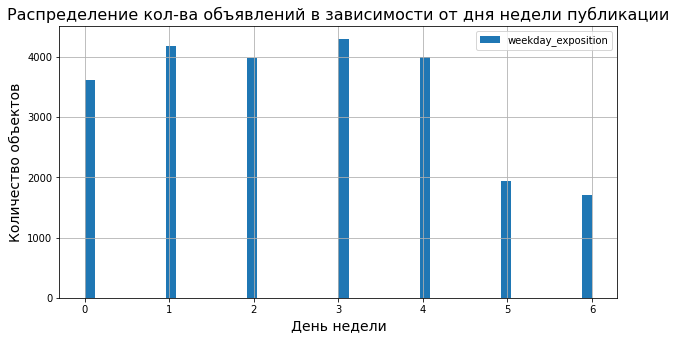

In [82]:
data.plot(y='weekday_exposition', kind='hist', bins=50, grid=True, figsize=(10,5), range=(0,6))
plt.title('Распределение кол-ва объявлений в зависимости от дня недели публикации', fontsize=16)
plt.xlabel('День недели', fontsize=14) 
plt.ylabel('Количество объектов', fontsize=14)
data['weekday_exposition'].describe()

**Вывод weekday_exposition:** Обычно, объявления о продаже недвижимости размещают в рабочие дни.

count    23698.000000
mean         6.400076
std          3.491632
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

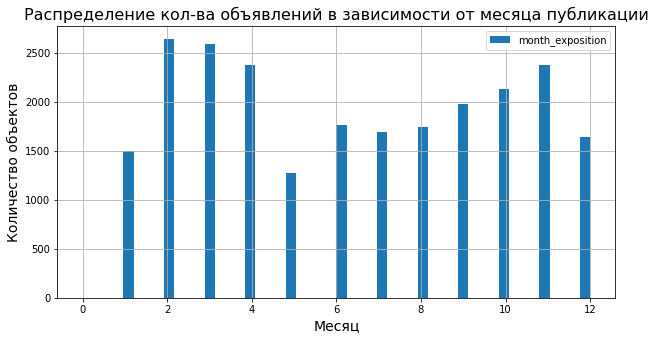

In [83]:
data.plot(y='month_exposition', kind='hist', bins=50, grid=True, figsize=(10,5), range=(0,12))
plt.title('Распределение кол-ва объявлений в зависимости от месяца публикации', fontsize=16)
plt.xlabel('Месяц', fontsize=14) 
plt.ylabel('Количество объектов', fontsize=14)
data['month_exposition'].describe()

**Вывод month_exposition:** Самые популярные месяца для публикации объявлений о продаже квартиры это февраль, март, апрель и ноябрь.

**2. Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.**

count    23698.000000
mean       156.614651
std        213.549508
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

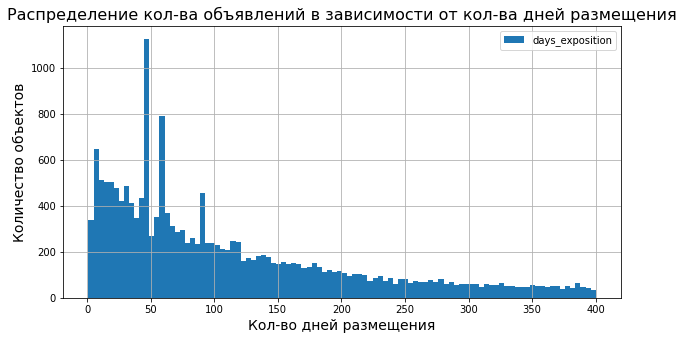

In [84]:
data.plot(y='days_exposition', kind='hist', bins=100, grid=True, figsize=(10,5), range=(1,400))
plt.title('Распределение кол-ва объявлений в зависимости от кол-ва дней размещения', fontsize=16)
plt.xlabel('Кол-во дней размещения', fontsize=14) 
plt.ylabel('Количество объектов', fontsize=14)
data['days_exposition'].describe()

**Вывод days_exposition:** Есть 3 явных пика, подозреваю что это автоматическое закрытие объявлений от площадки. Распределение очень плавное, для каждого вида объекта будет свой срок средней продажи. Если смотреть вот так, вообщем, в среднем для продажи требуется от 1 до 6 месяцев. (Медиана 74, среднее 156)

**3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
 Изучите, зависит ли цена от:**

**Зависимость цены от общей площади**

Корреляция Пирсона: 0.6537294473872789


,median
,last_price
total_area,
12.0,2400000.0
13.0,1850000.0
13.2,1686000.0
14.0,1190000.0
15.0,1725000.0


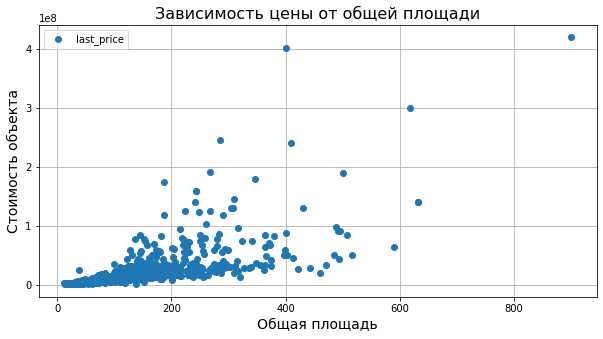

In [85]:
total_area_pivot = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['median'])
total_area_pivot.plot(y = 'median', grid=True, style='o', figsize=(10, 5))
plt.title('Зависимость цены от общей площади', fontsize=16)
plt.xlabel('Общая площадь', fontsize=14) 
plt.ylabel('Стоимость объекта', fontsize=14)
print('Корреляция Пирсона:', data['total_area'].corr(data['last_price']))
total_area_pivot.head()

**Вывод:** Корреляция высокая (0.65) => цена квартиры сильно зависит от общей площади

**Зависимость цены от жилой площади**

Корреляция Пирсона: 0.5561144639307607


,median
,last_price
living_area,
2.0,4340000.0
3.0,34715000.0
5.0,2680000.0
5.4,6100000.0
6.0,3799000.0


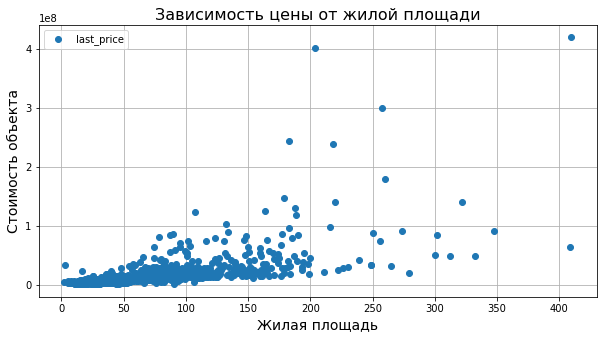

In [86]:
living_area_pivot = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['median'])
living_area_pivot.plot(y = 'median', grid=True, style='o', figsize=(10, 5))
plt.title('Зависимость цены от жилой площади', fontsize=16)
plt.xlabel('Жилая площадь', fontsize=14) 
plt.ylabel('Стоимость объекта', fontsize=14)
print('Корреляция Пирсона:', data['living_area'].corr(data['last_price']))
living_area_pivot.head()

**Вывод:** Корреляция высокая (0.55) ниже чем с общей площадью, но так же виляние жилой площади на цену - существенное

**Зависимость цены от площади кухни**

Корреляция Пирсона: 0.519875292979164


,median
,last_price
kitchen_area,
1.30,4250000.0
2.00,2720000.0
2.30,2940000.0
2.40,2200000.0
2.89,5967734.0


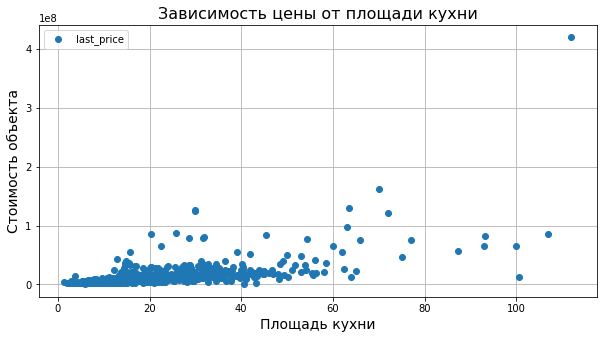

In [87]:
kitchen_area_pivot = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['median'])
kitchen_area_pivot.plot(y = 'median', grid=True, style='o', figsize=(10, 5))
plt.title('Зависимость цены от площади кухни', fontsize=16)
plt.xlabel('Площадь кухни', fontsize=14) 
plt.ylabel('Стоимость объекта', fontsize=14)
print('Корреляция Пирсона:', data['kitchen_area'].corr(data['last_price']))
kitchen_area_pivot.head()

**Вывод:** Корреляция высокая (0.51) => зависимость цены от площади кухни - существенная

**Зависимость цены от количества комнат**

Корреляция Пирсона: 0.3633875852913964


,median,count
rooms,,
0,2700000,197
1,3600000,8046
2,4770169,7940
3,6200000,5814
4,9000000,1180


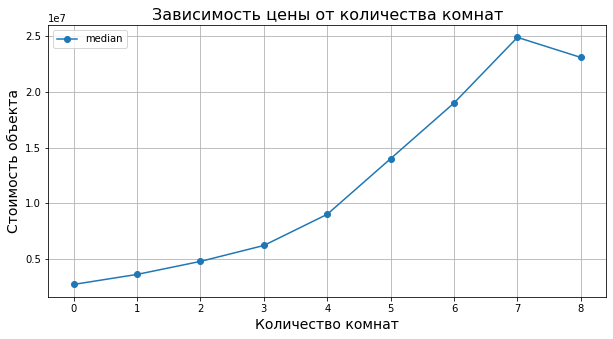

In [88]:
rooms_pivot = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['median', 'count'])
rooms_pivot.columns = ['median', 'count']
rooms_pivot.query('count > 10').plot(y = 'median', grid=True, style='-o', figsize=(10, 5))
plt.title('Зависимость цены от количества комнат', fontsize=16)
plt.xlabel('Количество комнат', fontsize=14) 
plt.ylabel('Стоимость объекта', fontsize=14)
print('Корреляция Пирсона:', data['rooms'].corr(data['last_price']))
rooms_pivot.head()

**Вывод:** На графике присутствовали редкие квартиры с большим количеством комнат, поэтому составляем таблицу с ограничением в как минимум 10 квартир с таким кол-вом комнат. Корреляция ниже чем в сравнениях с площадями => делаем вывод что зависимость есть, но слабее. Для цены важнее площадь, чем количество комнат.

**Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)**

,median
,last_price
floor_type,
другой,4850000
первый,3900000
последний,4300000


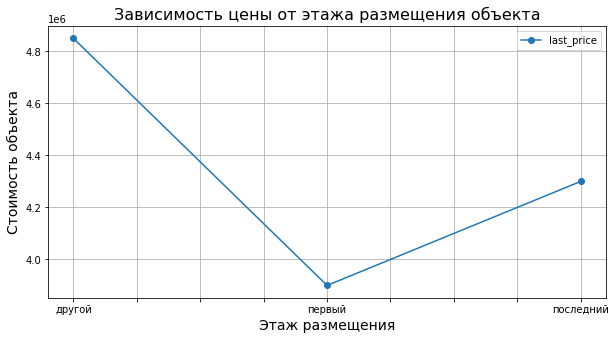

In [89]:
floor_type_pivot = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['median'])
floor_type_pivot.plot(y = 'median', grid=True, style='-o', figsize=(10, 5))
plt.title('Зависимость цены от этажа размещения объекта', fontsize=16)
plt.xlabel('Этаж размещения', fontsize=14) 
plt.ylabel('Стоимость объекта', fontsize=14)
floor_type_pivot.head()

**Вывод:** Квартиры на первом и последнем этаже обычно дешевле

**Зависимость цены от даты размещения (день недели, месяц, год).**

,median
,last_price
weekday_exposition,
0,4650000
1,4730000
2,4700000
3,4650000
4,4585000


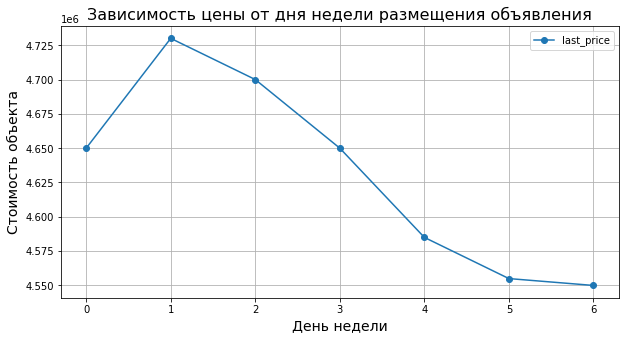

In [90]:
weekday_exposition_pivot = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['median'])
weekday_exposition_pivot.plot(y = 'median', grid=True, style='-o', figsize=(10, 5))
plt.title('Зависимость цены от дня недели размещения объявления', fontsize=16)
plt.xlabel('День недели', fontsize=14) 
plt.ylabel('Стоимость объекта', fontsize=14)
weekday_exposition_pivot.head()

,median
,last_price
month_exposition,
1,4600000
2,4650000
3,4650000
4,4800000
5,4515000


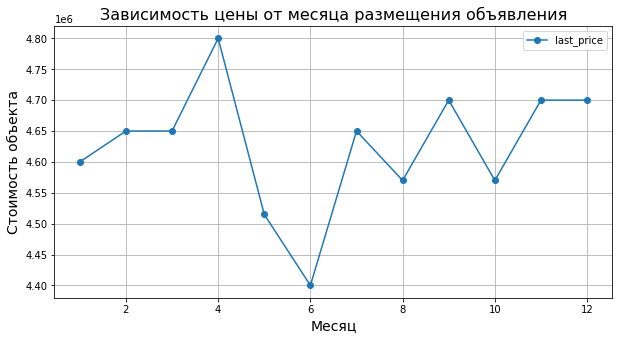

In [91]:
month_exposition_pivot = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['median'])
month_exposition_pivot.plot(y = 'median', grid=True, style='-o', figsize=(10, 5))
plt.title('Зависимость цены от месяца размещения объявления', fontsize=16)
plt.xlabel('Месяц', fontsize=14) 
plt.ylabel('Стоимость объекта', fontsize=14)
month_exposition_pivot.head()

,median
,last_price
year_exposition,
2014,7700000
2015,5350000
2016,4550000
2017,4500000
2018,4550000


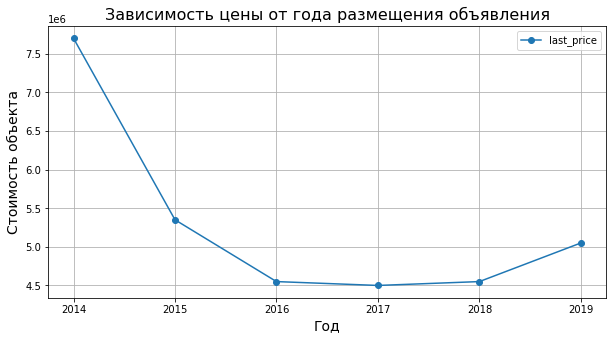

In [92]:
year_exposition_pivot = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['median'])
year_exposition_pivot.plot(y = 'median', grid=True, style='-o', figsize=(10, 5))
plt.title('Зависимость цены от года размещения объявления', fontsize=16)
plt.xlabel('Год', fontsize=14) 
plt.ylabel('Стоимость объекта', fontsize=14)
year_exposition_pivot.head()

**Вывод:** В начале недели чаще размещают объявления с квартирами дороже (возможно это связанно с тем что в будние дни объявления публикую чаще риэлторы и агенства, а на выходных - собственники). По месяцам: пик приходит на апрель (самый высокий спрос) и сильно падает к июню. Видимо в июне люди заняты другими делами и не хотят заниматься покупкой недвижимости. По годам: цена падала с 2014 до 2016 года, после 2018 начинает расти.

**4. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.**

In [96]:
locality_top10 = data['locality_name'].value_counts().head(10)
locality_top10_pivot = data.query('locality_name in @locality_top10.index').pivot_table(values='price_square_meter', index='locality_name').round(1)
locality_top10_pivot.sort_values('price_square_meter', ascending=False)

,price_square_meter
locality_name,
санкт-петербург,114817.7
пушкин,103125.4
кудрово,95324.5
парголово,90175.5
мурино,86087.1
шушары,78676.9
колпино,75424.2
гатчина,68745.7
всеволожск,68654.0


**Вывод:** Самая высокая цена за м2 конечно же в Санкт-Петербурге. Самая низкая в топ10 - Выборг.

**5. Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.**

,price_square_meter
distance_to_center_km,
0,187323.7
1,166603.3
2,146662.4
3,129415.9
4,137475.0
5,146978.8
6,152277.5
7,141399.3
8,119864.3


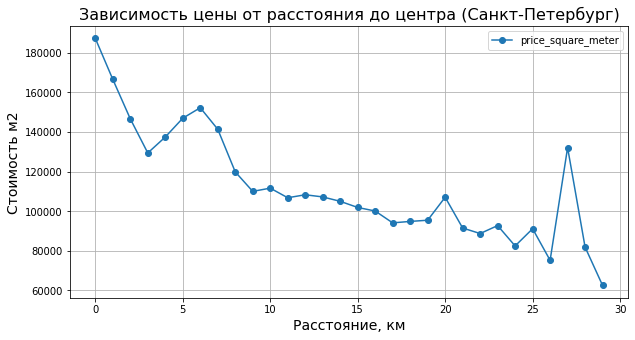

In [100]:
data['distance_to_center_km'] = data['distance_to_center_km'].fillna(301) # вынесем из графика пропущенные значения
data['distance_to_center_km'] = data['distance_to_center_km'].astype('int')
distance_to_center_km_pivot = data.query('locality_name == "санкт-петербург" and distance_to_center_km <= 300').pivot_table(index='distance_to_center_km', 
                        values='price_square_meter', aggfunc='mean').round(1)
distance_to_center_km_pivot.plot(y='price_square_meter', style='-o', grid=True, figsize=(10, 5))
plt.title('Зависимость цены от расстояния до центра (Санкт-Петербург)', fontsize=16)
plt.xlabel('Расстояние, км', fontsize=14) 
plt.ylabel('Стоимость м2', fontsize=14)
distance_to_center_km_pivot.head(10)

**Вывод:** Самый дорогой м2 конечно же в центре. В 7 км от центра цена начинает стабильно снижаться. Есть провал на расстоянии 3 км от центра, возможно в какой-то стороне на этом расстоянии есть спальный район с недорогими квартирами.  

### Общий вывод

Проведя исследовательский анализ данных по архиву объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах, можно сделать выводы:
  
- Среди объявлений преобладают 1 и 2х комнатные квартиры с площадью от 40 до 70 м2, с высотой потолка от 2.5 до 2.8 м, расположенные с 1го по 8ой этаж.
- Большинство квартир размещены в 5и и 9и этажных домах на расстоянии от 9 до 16 км от центра города.
- Среднее расстояние до аэропорта чаще всего находится в диапазоне от 20 до 40 км. До ближайшего парка, в среднем, от 300 до 600 метров.
- Стоимость квартир чаще всего находится в диапозоне от 3.4 до 7 млн рублей.
- Пик кол-ва опубликованных объявлений приходит на весну (с февраля по апрель) и так же большое кол-во объявление публикуется в начале зимы (ноябрь). Большую часть объявлений размещают в будние дни. В апреле, обычно, самые высокие цены по году, в июне же цены заметно снижаются.
- На поиск покупателя для квартиры в среднем требуется от 1 до 6 месяцев.
- Цены на квартиры сильно зависят от общей площади, жилой площади, площади кухни и расположения относительно центра города. Количество комнат влияет на стоимость квартиры в меньшей степени.
- Существенно дешевле продаются квартиры расположенные на первом и последнем этаже здания.
- В будние дни чаще публикуют объявления с квартирами дороже, в выходные же, в среднем, публикуют объявления дешевле.
- Цены на квартиры падали с 2014 по 2016 год, но после 2018 год начался рост.
- Самая высокая цена за 1 м2 находится в центре Санкт-Петербурга.
